## STAT 207 Lab 6: Central Limit Theorem and Confidence Intervals - [25 total points] - Solutions

Due: Wednesday, March 17 11:59pm CST <font color='green'>Happy St. Patrick's Day!</font>



## <u>Case Study</u>: U.S. County Home Ownership
In this lab we will explore the statistical concepts that we've learned this week while also examining the **homeownership rates** of the counties in the U.S. 

### Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 1. <u>Preliminaries</u>

### 1a. [0.5 pt] Read the county.csv into a dataframe, call it df, and display the first five rows.

Remember that 'data unavailable' represents missing values in this csv. Make sure you encode these values as NaN when you read the data in.

In [2]:
df = pd.read_csv('county.csv')
df.head()

,name,state,pop2000,pop2010,pop2017,pop_change,poverty,homeownership,multi_unit,unemployment_rate,metro,median_edu,per_capita_income,median_hh_income,smoking_ban
0,Autauga County,Alabama,43671,54571,55504,1.48,13.7,77.5,7.2,3.86,yes,some_college,27841.7,55317,none
1,Baldwin County,Alabama,140415,182265,212628,9.19,11.8,76.7,22.6,3.99,yes,some_college,27779.85,52562,none
2,Barbour County,Alabama,29038,27457,25270,-6.22,27.2,68.0,11.1,5.9,no,hs_diploma,17891.73,33368,partial
3,Bibb County,Alabama,20826,22915,22668,0.73,15.2,82.9,6.6,4.39,yes,hs_diploma,20572.05,43404,none
4,Blount County,Alabama,51024,57322,58013,0.68,15.6,82.0,3.7,4.02,yes,hs_diploma,21367.39,47412,none


In [3]:
df.dtypes
#pop2000, pop2017, popchange, poverty, unemployment rate, per capita income, median hh income all need to be changed

name                  object
state                 object
pop2000               object
pop2010                int64
pop2017               object
pop_change            object
poverty               object
homeownership        float64
multi_unit           float64
unemployment_rate     object
metro                 object
median_edu            object
per_capita_income     object
median_hh_income      object
smoking_ban           object
dtype: object

In [4]:
for i in df['pop2000'].unique():
    print(i)
#data unavailable is only value that is not a number
    

43671
140415
29038
20826
51024
11714
21399
112249
36583
23988
39593
15922
27867
14254
14123
43615
54984
14089
12202
37631
13665
77483
49129
46365
64452
65874
38440
103459
18495
31223
25764
9974
17185
16310
88787
53926
662047
15904
87966
34803
115092
65676
13473
24105
276700
22539
31214
82231
399843
24324
223510
111064
11861
20949
29605
22380
49756
64742
143293
14798
80321
41475
164875
70713
18097
13183
24843
2697
5465
260283
16006
1258
1893
4922
82840
2392
3436
30711
49691
14070
13913
1823
59322
9196
7385
7208
6684
6146
8835
data unavailable
6174
10195
7028
808
6551
69423
117755
116320
51335
33489
8547
19715
3072149
155032
97470
843746
179727
38381
167517
160026
20749
24209
38386
153406
33948
12600
5744
25357
14117
23546
17609
24046
8571
25603
20336
82148
53247
50866
19526
9210
15341
18723
86014
17771
11642
88068
16464
37331
23587
30353
14300
34233
13249
18418
84278
22781
8559
17774
12580
14492
13628
22486
52828
14243
16140
40443
51979
10254
9245
9955
8608
28790
10209
26445
11303
25614

36348
2593
11775
6964
888
7149
3242
2242
69416
123138
4831
5757
2283
3600
2757
4331
3759
1924
66109
2841
2754
2715
2753
4701
2308
5987
3390
5737
8644
25303
6631
3715
2065
8585
4675
12066
5890
2610
17998
13674
4366
1710
767
22636
2258
21908
2876
8477
12389
58795
5102
19761
27330
108473
52523
102728
62223
46611
70226
332807
28836
38890
144742
177977
40543
112075
36655
46966
1393978
53309
39500
109989
79551
122759
28433
1068978
42084
31069
90895
147886
40792
845303
71295
31945
15856
29210
40875
28241
38943
59487
32641
73894
54500
227511
62319
145491
46005
284664
455054
40213
257555
66217
151095
23072
40924
98868
15180
559062
14897
31628
84585
14058
40985
20293
34078
52727
27695
152061
42337
34726
128852
73345
61792
79195
58683
47910
378098
542899
225116
90914
40909
29659
12806
158383
63251
111564
39188
121065
22908
21038
6105
13879
5857
19799
11976
36534
30150
87697
45621
42521
3148
208016
6031
114996
6614
14950
67367
26142
37077
4743
4075
57813
27210
45516
5144
6061
3283
3562
11792
14154

In [5]:
missing_values = ['data unavailable']
df = pd.read_csv("county.csv", na_values = missing_values)

In [6]:
df.dtypes

name                  object
state                 object
pop2000              float64
pop2010                int64
pop2017              float64
pop_change           float64
poverty              float64
homeownership        float64
multi_unit           float64
unemployment_rate    float64
metro                 object
median_edu            object
per_capita_income    float64
median_hh_income     float64
smoking_ban           object
dtype: object

### 1b. [0.5pt] Display the shape of the dataframe.

In [7]:
df.shape

(3142, 15)

### 1.c. [0.5 pt] How many missing values does the homeownership rate variable have?

In [8]:
df['homeownership'].isna().sum()

0

the homeownership rate variable has no missing values

## 2. <u>Central Limit Theorem Exploration</u>

### 2.a. Population of County Homeownership Rates

Let's assume that the homeownership rate in this dataset represents a **population**, where the population is the homeownership rates of ALL counties in the U.S.

#### 2.a.i. [0.5 pt] Calculate the population mean and the population standard deviation homeownership rates.

In [9]:
ho_mean = df['homeownership'].mean()
ho_mean

73.26645448758752

In [10]:
ho_std = df['homeownership'].std()
ho_std

7.831929689986538

#### 2.a.ii  [0.5 pt] Plot the population distribution of homeownership rates.

Make sure you label your x-axis and title appropriately.

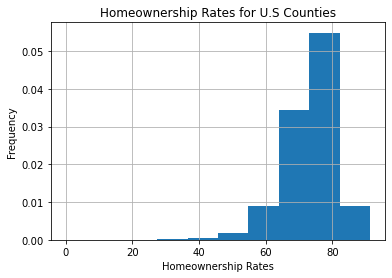

In [11]:
df['homeownership'].hist(density = True)
plt.ylabel("Frequency")
plt.xlabel("Homeownership Rates")
plt.title("Homeownership Rates for U.S Counties")
plt.show()

### 2.b. Random Sample of County Homeownership Rates

#### 2.b.i. [1 pt] Collect a random sample of size 50 from this population (using a random state of 100) WITHOUT replacement.

In [12]:
random_samp0 = df['homeownership'].sample(50, replace = False, random_state = 100)
random_samp = pd.DataFrame({'Homeownership Rates' : random_samp0})


random_samp

,Homeownership Rates
1167,74.0
1048,64.7
1920,70.6
1739,77.1
3138,60.8
496,81.6
1744,75.7
1147,61.4
1247,71.5
1332,78.3


#### 2.b.ii.  [0.5 pt]  Calculate the mean and standard deviation of this sample.

In [13]:
rand_mean = random_samp['Homeownership Rates'].mean()
rand_mean

74.97800000000001

In [14]:
rand_std = random_samp['Homeownership Rates'].std()
rand_std

5.516220607981371

#### 2.b.iii.  [0.5 pt]  Plot the sample distribution.

Make sure that you label the x-axis and title appropriately.

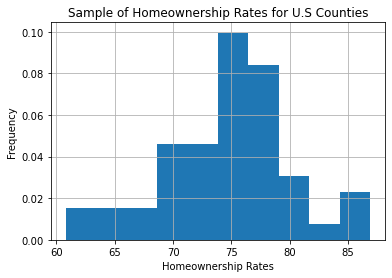

In [15]:
random_samp.hist(density = True)
plt.ylabel("Frequency")
plt.xlabel("Homeownership Rates")
plt.title("Sample of Homeownership Rates for U.S Counties")
plt.show()

### 2.c. Sampling Distribution

Suppose we were to create a sampling distribution with many, many sample means homeownership rates, where each sample was of size 50 (drawn with replacement from the population of all county homeownership rates).

#### 2.c.i.  [1 pt]  What is the mean of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the theoretical mean of this sampling distribution?)

In [16]:
ho_mean

73.26645448758752

the theoretical mean of this sampling distribution would equal the population mean $\mu\$ (73.26645448758752)

#### 2.c.ii.  [1 pt]  What is the standard deviation of this sampling distribution?

(Not looking for you to *actually* create a sampling distribution. What is the *theoretical* standard deviation of this sampling distribution?)

In [17]:
std_sampling_dist = ho_std/(np.sqrt(50))
std_sampling_dist

1.107602118713147

the theoretical standard deviation of this sampling distribution would equal the population standard deviation divided by the square root of n $\sigma\ / sqrt(n)$ (1.107602118713147)

#### 2.c.iii.  [2 pt]  Will this sampling distribution of sample means be approximately normal? Explain why.

Yes, becuase the sample size, n, is greater than 30 and less than 10% of population size and is randomly sampled

#### 2.c.iv.  [1 pt]  Calculate the probability that a randomly selected sample mean (from this sampling distribution) is greater than or equal to the sample mean that we calculated in (2.b). 

(You should assume in this case that you *do know* the population mean and standard deviation homeownership rates).

In [18]:
from scipy.stats import norm
1 - norm.cdf(rand_mean, loc = ho_mean, scale = std_sampling_dist )

0.06114035488312297

#### 2.c.v.  [0.5 pt]  What is the value of a sample mean that is the same distance away from the population mean that our sample mean from 2b is, but is *less than* the population mean)?

In [19]:
diff_mean = abs(ho_mean - rand_mean)
diff_mean

1.711545512412485

In [20]:
low_sample = ho_mean - diff_mean
low_sample

71.55490897517504

the value of the sample mean is 71.554909


#### 2.c.vi.  [1 pt] Calculate the probability that a randomly selected sample mean (from this sampling distribution) is less than or equal to the sample mean that we calculated in (2.c.v.). 

In [21]:
norm.cdf(low_sample, loc = ho_mean, scale = std_sampling_dist)

0.06114035488312293

## 3. Confidence Intervals for a Population Mean

While we technically have the population of all U.S. county homeownership rates (and can therefore calculate the population mean), we would still like to calculate a confidence interval to learn more about how confidence intervals behave. (By having a population, it allows us to "check" our answers to see how well our confidence intervals did.)

### 3.a. First, we would like to construct a *single* 92% confidence interval for the average homeownership rate of ALL U.S. counties.

#### 3.a.i.  [1 pt]  Check the conditions for creating a confidence interval for average homeownership rate of ALL U.S. counties.

sampling distribution is normal becuase n is greater than 30, n is less than 10% of population size, and it is ranodmly sampled

#### 3.a.ii.  [3 pt] Now create this 92% confidence interval using the random sample that you collected in 2b.

**ASSUME THAT YOU DO NOT KNOW WHAT THE POPULATION STANDARD DEVIATION HOMEOWNERSHIP RATE IS.**

In [22]:
#92% CI would put 92 at center and 4 on each side so 96
critical_value = norm.ppf(.96)
critical_value

1.7506860712521692

In [23]:
ll = rand_mean - critical_value * (rand_std/(np.sqrt(50)))
ul = rand_mean + critical_value * (rand_std/(np.sqrt(50)))


print('(',ll,',', ul, ')')


( 73.61226983854658 , 76.34373016145344 )


#### 3.a.iii.  [1 pt]  Now interpret this confidence interval.

We are 92% confident that the average homeownership rate is between 73.61227 and 76.34373

#### 3.a.iv.  [1 pt]  Because we *actually* know the population mean home ownership rate, check whether this population mean falls within this confidence interval you just calculated.

In [24]:
ho_mean

73.26645448758752

It falls just outside the interval we created

<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### <u> Tutorial</u> ANDS and ORS in if-statements

We can check multiple conditions in an if-statement by using the 'and' and the 'or' operators as shown below.


In [25]:
a=20

if a < 30 and a>10:
    print('a is between 10 and 30')
else:
    print('otherwise')

a is between 10 and 30


In [26]:
if a >= 30 or a <=10:
    print('a is at most 10 or at least 30')
else:
    print('otherwise')

otherwise


<hr style="height:1px;border:none;color:#333;background-color:#333;" />

### 3.b. Next, let's construct 1000 92% confidence intervals for the average homeownership rate of ALL U.S. counties.

#### 3.b.i.  [2 pt] Create a function that does the following.
* <u>Input</u> The input for your function should take in the following values.
    - a lower bound of a confidence interval
    - an upper bound of a confidence interval
    - a population mean $\mu$
* <u>What it does</u>
    - Your function should check whether $lower \: bound\leq \mu\leq upper\: bound$.
    - If this is the case, it should return True
    - If this is not the case, then it should return False.

In [27]:
def check_CI(ll,ul,mu):
    if ll <= mu and mu <= ul:
        return True
    else:
        return False

#### 3.b.ii.  [1 pt]  Test your function out using the population mean and the confidence interval from 3a.

In [28]:
#check_CI(ll,ul,ho_mean)
check_CI(ll,ul,ho_mean)

False

#### 3.b.iii.  [2 pt]  Using your function above to do the following:
* Collect 1000 random samples (each of size 50 without replacement) from the population of all U.S. county homeownership rates.
* Calculate the sample mean homeownership rate and sample standard deviation of each of these random samples.
* Create a 92% confidence interval around each of these sample means (assume that you don't know the population standard deviation).

What percent of these 1000 confidence intervals *actually* contained the population mean homeownership rate?

In [29]:
num_trials = 1000
count = 0


for i in range(num_trials) :
    new_sample = df['homeownership'].sample(50, replace = False)
    new_sample_mean = new_sample.mean()
    new_sample_std = new_sample.std()
    lower_limit = new_sample_mean - critical_value * (new_sample_std/(np.sqrt(50)))
    upper_limit = new_sample_mean + critical_value * (new_sample_std/(np.sqrt(50)))
    count += check_CI(lower_limit,upper_limit,ho_mean)
perc = count/num_trials
print("Total number of confidence intervals that actually contained the population mean homeownership rate:", count)
print("Total number of trials:", num_trials)
print('The proportion of the', num_trials, 'where the confidence intervals actually contained the population mean homeownership rate is', count/num_trials)

    


Total number of confidence intervals that actually contained the population mean homeownership rate: 906
Total number of trials: 1000
The proportion of the 1000 where the confidence intervals actually contained the population mean homeownership rate is 0.906


#### 3.b.iv.  [0.5 pt]  What is the difference between this percentage from (3.b.iii) and your confidence level?

In [30]:
.92 - perc

0.014000000000000012

## 4. More Probability

### 4a.  [0.5 pt]  What is the probability that we randomly select a county from the population that has a homeownership rate that is below 50%?

In [31]:
below_50 = df[df['homeownership']<50]
prob = below_50.shape[0]/df.shape[0]
prob

0.012412476129853597

### 4.b. *Suppose* were to collect a random sample of 7 counties from the population of U.S. counties (with replacement). 

Don't *actually* take a random sample. This is a *theoretical* math problem.

#### 4.b.i.  [1 pt] What is the probability that 2 of these counties have a homeownership rate that is below 50%?

In [32]:
from scipy.stats import binom
#7 choose 2 = 7*6*5*4*3*2*1/(2)(5 * 4 * 3 * 2) = 7*6/(2) = 21 * (p)^2 * (1-p)^5
#21 * (prob ** 2) * ((1-prob)**5)
binom.pmf(2,n=7, p = prob)

0.003039583804094734

#### 4.b.ii.  [1 pt]  What is the probability that at most 2 counties have a homeownership rate that is below 50%?

In [33]:
binom.cdf(2, n= 7, p = prob)

0.9999355220934946